<br />

<div style="text-align: center;">
<font size="7">数値計算試験問題</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">2024/07/10 実施</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2024</font>
</div>

 # 1 簡単な行列計算:25点 
 
 次の行列
  $
  A = \left(\begin{array}{ccc}
    0 & -2 & 0 \\
    1 & 3 & 0 \\
    -1 & 0 & 3
  \end{array}
  \right)
  $
  の固有値と固有ベクトルを求めよ．
  
  また，固有ベクトルで構成される対角化行列$P$ を用いて，ドット演算 により$P^{-1}.A.P$が対角化されることを確かめよ．


In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) 

aa = np.array([[0,-2,0],[1,3,0],[-1,0,3]])
print(aa)

In [2]:
import scipy.linalg as linalg
l, PP = linalg.eig(aa)
print(l)
print(PP)

[3.+0.j 2.+0.j 1.+0.j]
[[ 0.000 -0.577  0.816]
 [ 0.000  0.577 -0.408]
 [ 1.000 -0.577  0.408]]


In [3]:
linalg.inv(PP).dot(aa).dot(PP)

array([[ 3.000,  0.000,  0.000],
       [ 0.000,  2.000, -0.000],
       [ 0.000,  0.000,  1.000]])

# 2 Gauss-Seidelの収束性:25点

初期値を$[0,0,0]^{t}$として，
$A(tt)x=b$ 
にガウス・ザイデルによる連立一次方程式の反復解法プログラムを適用する．
ただし，
\begin{equation}
A(tt)=
\left(
\begin{array}{ccc}
1&tt&tt \\
tt&1&tt \\
tt&tt&1
\end{array}
\right)
, \, 
b=
\left(
\begin{array}{c}
4 \\
4 \\
4 \\
\end{array}
\right)
\end{equation}

である．
$tt=0.25,0.5,0.75$ に対して有効数字6桁の解を得るための反復回数を求めよ．

(E.クライツィグ著「数値解析」(培風館,2003), p.89, 問題2.3-9)

In [4]:
import numpy as np
np.set_printoptions(precision=7, suppress=True)

tt=0.25
A=np.array([[1,tt,tt],[tt,1,tt],[tt,tt,1]])
b=np.array([4,4,4])
n=3
x0=np.zeros(n)
x1=np.zeros(n)

for iter in range(0, 10):
    for i in range(0, n):
        x1[i]=b[i]
        for j in range(0, n):
            x1[i]=x1[i]-A[i][j]*x0[j]
        x1[i]=x1[i]+A[i][i]*x0[i]
        x1[i]=x1[i]/A[i][i]
        x0[i]=x1[i]
    print(iter,x0)


0 [4.   3.   2.25]
1 [2.6875    2.765625  2.6367188]
2 [2.6494141 2.6784668 2.6680298]
3 [2.6633759 2.6671486 2.6673689]
4 [2.6663706 2.6665651 2.6667661]
5 [2.6666672 2.6666417 2.6666728]
6 [2.6666714 2.666664  2.6666662]
7 [2.6666675 2.6666666 2.6666665]
8 [2.6666667 2.6666667 2.6666666]
9 [2.6666667 2.6666667 2.6666667]


In [5]:
import numpy as np
np.set_printoptions(precision=7, suppress=True)

tt=0.5
A=np.array([[1,tt,tt],[tt,1,tt],[tt,tt,1]])
b=np.array([4,4,4])
n=3
x0=np.zeros(n)
x1=np.zeros(n)

for iter in range(0, 20):
    for i in range(0, n):
        x1[i]=b[i]
        for j in range(0, n):
            x1[i]=x1[i]-A[i][j]*x0[j]
        x1[i]=x1[i]+A[i][i]*x0[i]
        x1[i]=x1[i]/A[i][i]
        x0[i]=x1[i]
    print(iter,x0)


0 [4. 2. 1.]
1 [2.5   2.25  1.625]
2 [2.0625   2.15625  1.890625]
3 [1.9765625 2.0664062 1.9785156]
4 [1.9775391 2.0219727 2.0002441]
5 [1.9888916 2.0054321 2.0028381]
6 [1.9958649 2.0006485 2.0017433]
7 [1.9988041 1.9997263 2.0007348]
8 [1.9997694 1.9997479 2.0002413]
9 [2.0000054 1.9998766 2.000059 ]
10 [2.0000322 1.9999544 2.0000067]
11 [2.0000194 1.9999869 1.9999968]
12 [2.0000081 1.9999975 1.9999972]
13 [2.0000027 2.0000001 1.9999986]
14 [2.0000006 2.0000004 1.9999995]
15 [2.0000001 2.0000002 1.9999999]
16 [2.        2.0000001 2.       ]
17 [2. 2. 2.]
18 [2. 2. 2.]
19 [2. 2. 2.]


In [6]:
import numpy as np
np.set_printoptions(precision=7, suppress=True)

tt=0.75
A=np.array([[1,tt,tt],[tt,1,tt],[tt,tt,1]])
b=np.array([4,4,4])
n=3
x0=np.zeros(n)
x1=np.zeros(n)

for iter in range(0, 40):
    for i in range(0, n):
        x1[i]=b[i]
        for j in range(0, n):
            x1[i]=x1[i]-A[i][j]*x0[j]
        x1[i]=x1[i]+A[i][i]*x0[i]
        x1[i]=x1[i]/A[i][i]
        x0[i]=x1[i]
    print(iter,x0)


0 [4.   1.   0.25]
1 [3.0625    1.515625  0.5664062]
2 [2.4384766 1.7463379 0.8613892]
3 [2.0442047 1.8208046 1.101243 ]
4 [1.8084643 1.8177195 1.2803621]
5 [1.6764388 1.7823993 1.4058714]
6 [1.6087969 1.7389987 1.4891533]
7 [1.578886  1.6989705 1.5416076]
8 [1.5695664 1.6666195 1.5728606]
9 [1.5703899 1.6425621 1.590286 ]
10 [1.5753639 1.6257626 1.5991551]
11 [1.5813117 1.6146499 1.6030288]
12 [1.586741  1.6076726 1.6041898]
13 [1.5911032 1.6035303 1.6040249]
14 [1.5943336 1.6012311 1.6033264]
15 [1.5965818 1.6000688 1.602512 ]
16 [1.5980644 1.5995677 1.6017759]
17 [1.5989923 1.5994238 1.6011879]
18 [1.5995412 1.5994532 1.6007542]
19 [1.5998444 1.599551  1.6004534]
20 [1.5999967 1.5996624 1.6002557]
21 [1.6000614 1.5997622 1.6001323]
22 [1.6000792 1.5998414 1.6000596]
23 [1.6000743 1.5998996 1.6000196]
24 [1.6000606 1.5999399 1.5999997]
25 [1.6000454 1.5999662 1.5999913]
26 [1.6000318 1.5999826 1.5999891]
27 [1.6000212 1.5999923 1.5999899]
28 [1.6000134 1.5999975 1.5999918]
29 [1.6000

# 3 家の価格

回帰モデルとして，家の売却価格の予測を行う．家の特徴量として，
x: 家の面積
y: 寝室の数
をとる．
z: 家の売却価格
とすると，５軒の家の表は次のようになる．

| 家番号|x面積|y:寝室数|z:売却価格|予想価格
|---|---|---|---|---|
|1 |0.846|1|115 |120.52
|2 |1.324|2|234.5
|3 |1.150|3|198
|4 | 3.037|4|528
|5| 3.084|5|572.5

2次元曲面のフィッティングを参考にして，
$$
z = a_0 + a_1 x + a_2 y
$$
の平面にフィッティングして，予想価格を求めよ．
(ステファン・ボイド，リーヴェン・ヴァンデンベルグ 「スタンフォード ベクトル・行列 からはじめる 最適化数学」 講談社 ２０２１年, c2 pp60-2)

In [7]:
import numpy as np

z = np.array([115, 234.5, 198, 528, 572.5])
x =np.array( [0.846, 1.324, 1.150, 3.037, 3.084])
y = np.array( [1,2,3,4,5])


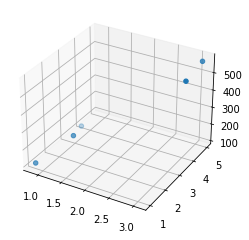

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(np.array(x),np.array(y),z) 

plt.show()

In [9]:
from pprint import pprint
import scipy.linalg as linalg

n = z.size
n_j = 3
bb=np.zeros([n])
A=np.zeros([n,n_j])
for i in range(0,n):
    A[i,0]=1
    A[i,1]=x[i]
    A[i,2]=y[i]
    bb[i]=z[i]

c, resid, rank, sigma = linalg.lstsq(A, bb)
pprint(c)

Ai = linalg.inv(np.dot(np.transpose(A),A))
b = np.dot(np.transpose(A),bb)
np.dot(Ai,b)


array([-38.2039269, 166.7913287,  17.6228467])


array([-38.2039269, 166.7913287,  17.6228467])

<IPython.core.display.Javascript object>


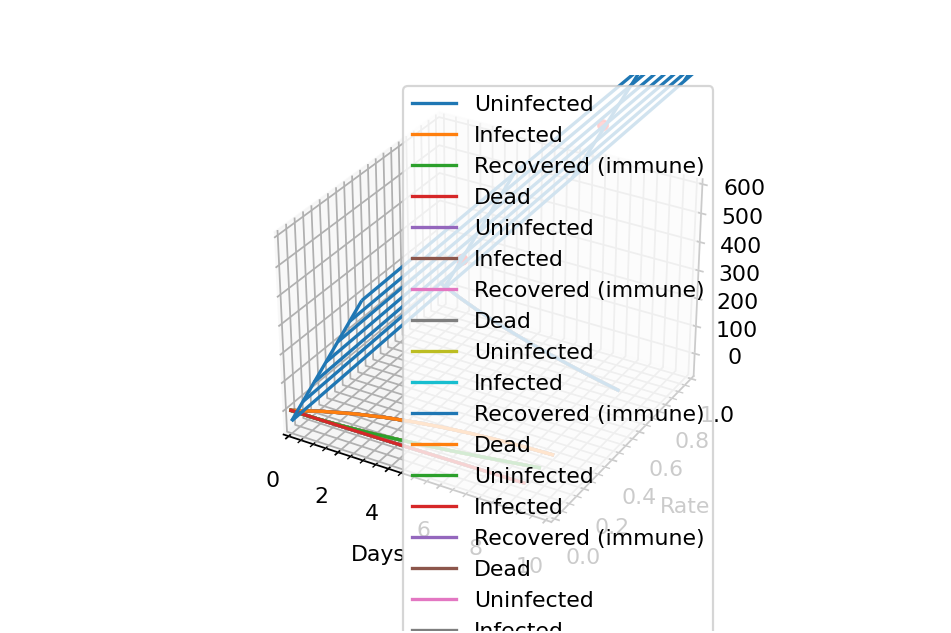

In [10]:
%matplotlib notebook 
# for jupyter notebook
# %matplotlib inline # for vscode


def z_surf(xx,yy):
    val = c[0] + c[1]*xx + c[2]*yy
    return val

x1 = np.arange(0,3.5,0.5)
y1 = np.arange(0,6,1)
X, Y = np.meshgrid(x1, y1)
Z1 = z_surf(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(np.array(x),np.array(y),z, color='r') 
ax.plot_wireframe(X,Y,Z1) 

plt.show()

In [11]:
x =np.array( [0.846, 1.324, 1.150, 3.037, 3.084])
y = np.array( [1,2,3,4,5])
z_surf(x,y)

array([120.5243839, 217.8734857, 206.4746411, 538.8327251, 564.2947642])

# 4 ページランク改(感染症の推移):25点

ページランクの元になった線形動的システムの代表例である
単純な感染症モデルを考える．
実際の感染症（例えばcovid19）では成り立たなかったのですが，
この問題では単純モデルを仮定します．
未感染，感染中，回復(免疫あり)と死亡の４種の状態がある．
これらの状態にある人には，毎日次のことが起こると仮定する．

- 未感染の人の5%がこの病気にかかる
    - 残りの95%は未感染のままである．
- 感染している人のうち
    - 1%が死亡する
    - 10%が回復して免疫を持ち
    - 4%は回復するが免疫を持たない（未感染の状態に戻る）
    - 残りの85%は感染状態のままである

なお回復して免疫を持った人と，
死亡した人はそのままの状態にとどまり続ける．
未感染，感染中，回復(免疫あり)と死亡のそれぞれ
$i$ 日目の状態の人の割合を$x_i$ベクトルで表す．
$i+1$ 日目の状態ベクトル$x_{i+1}$ は，
\begin{equation}
x_{i+1}=
\left(
\begin{array}{cccc}
0.95&0.04&0 &0 \\
A&B&0&0 \\
0&0.10&1&0 \\
0&0.01&0&1 \\
\end{array}
\right)
x_i
\end{equation}
という関係で表される

## (1) 遷移行列の完成
A,Bに入る数値は何か？
## (2) 手計算
初日の状態を
\begin{equation}
x_{0}=
\left(
\begin{array}{c}
1 \\
0 \\
0 \\
0 \\
\end{array}
\right)
\end{equation}

とすると2日目および3日目はどうなるか？
## (3) loopあるいは．．．
200日目はどういう状態に落ち着くか？

初日から２００日目までの，状態の変化をプロットしてください．ボーナスで10点プラスします．

(ステファン・ボイド，リーヴェン・ヴァンデンベルグ 「スタンフォード ベクトル・行列 からはじめる 最適化数学」 講談社 ２０２１年)

In [19]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.4f}'.format}) 

aa = np.array([[0.95,0.04,0,0],[0.05, 0.85,0,0],[0,0.10,1,0],[0,0.01,0,1]])
print(aa)


[[ 0.9500  0.0400  0.0000  0.0000]
 [ 0.0500  0.8500  0.0000  0.0000]
 [ 0.0000  0.1000  1.0000  0.0000]
 [ 0.0000  0.0100  0.0000  1.0000]]


In [20]:
x0=np.array([1,0,0,0])

In [21]:
x1 = aa.dot(x0)
print(x1)

[ 0.9500  0.0500  0.0000  0.0000]


In [22]:
aa.dot(x1)

array([ 0.9045,  0.0900,  0.0050,  0.0005])

In [44]:
x0=np.array([1,0,0,0])

for iter in range(0, 10):
    x1=aa.dot(x0)
    x0 = x1
    print(x0)

[ 0.9500  0.0500  0.0000  0.0000]
[ 0.9045  0.0900  0.0050  0.0005]
[ 0.8629  0.1217  0.0140  0.0014]
[ 0.8246  0.1466  0.0262  0.0026]
[ 0.7892  0.1658  0.0408  0.0041]
[ 0.7564  0.1804  0.0574  0.0057]
[ 0.7258  0.1912  0.0755  0.0075]
[ 0.6972  0.1988  0.0946  0.0095]
[ 0.6703  0.2038  0.1145  0.0114]
[ 0.6449  0.2068  0.1348  0.0135]


In [24]:
x0=np.array([1,0,0,0])

for iter in range(0, 200):
    x1=aa.dot(x0)
    x0 = x1

print(iter, x0)

199 [ 0.0011  0.0005  0.9077  0.0908]


In [65]:
x0=np.array([1,0,0,0])

history = []
for iter in range(0, 200):
    history.append(x0)
    x1=aa.dot(x0)
    x0 = x1
#print(history)



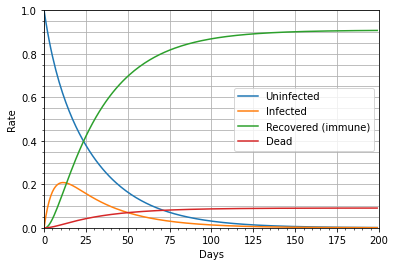

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

hist = np.array(history).T
times = np.arange(0,200)

labels = ["Uninfected", "Infected", "Recovered (immune)", "Dead"]
for d,label in zip(hist,labels):
    plt.plot(times, d, '-', label=label)
plt.legend()
plt.xlim(0, 200)
plt.ylim(0.0, 1.0)
plt.grid(axis="x")
plt.xlabel("Days")
plt.minorticks_on()
plt.ylabel("Rate")
plt.grid(which="both",axis="y")
plt.show()

# original by Hirayama in 2024